Import Libraries

In [92]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

Import the Data

In [102]:
# Load the embeddings and sentences
realmente_embeddings = np.load('realmente_embeddings.npy')
realmente_sentences = open('realmente_embeddings_sentences.txt', encoding='utf-8').readlines()

muy_embeddings = np.load('muy_embeddings.npy')
muy_sentences = open('muy_embeddings_sentences.txt', encoding = 'utf-8').readlines()

rapidamente_embeddings = np.load('rapidamente_embeddings.npy')
rapidamente_sentences = open('rapidamente_embeddings_sentences.txt', encoding='utf-8').readlines()


bastante_embeddings = np.load('bastante_embeddings.npy')
bastante_sentences = open('bastante_embeddings_sentences.txt', encoding='utf-8').readlines()

In [104]:
# Concatenate the embeddings and sentences
all_embeddings = np.concatenate([realmente_embeddings, muy_embeddings, rapidamente_embeddings, bastante_embeddings])
all_sentences = realmente_sentences + muy_sentences + rapidamente_sentences + bastante_sentences

# Calculate pairwise cosine similarities between the embeddings
similarities = cosine_similarity(all_embeddings)

# Perform k-means clustering
num_clusters = 4 # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(similarities)

# Perform PCA on the embeddings
pca = PCA(n_components=2, random_state=0)
embeddings_pca = pca.fit_transform(all_embeddings)

In [105]:
print(realmente_embeddings.shape)
print(muy_embeddings.shape)
print(rapidamente_embeddings.shape)
print(bastante_embeddings.shape)
print(embeddings_pca.shape)

(5371, 768)
(963, 768)
(956, 768)
(900, 768)
(8190, 2)


In [108]:
realmente_pca = embeddings_pca[:len(realmente_embeddings)]
muy_pca = embeddings_pca[realmente_pca.shape[0]:realmente_pca.shape[0] + muy_embeddings.shape[0]]
rapidamente_pca = embeddings_pca[realmente_embeddings.shape[0] + muy_embeddings.shape[0]:]
bastante_pca = embeddings_pca[len(embeddings_pca) - bastante_embeddings.shape[0]:]



print(realmente_pca.shape)
print(muy_pca.shape)
print(rapidamente_pca.shape)
print(bastante_pca.shape)

(5371, 2)
(963, 2)
(1856, 2)
(900, 2)


In [109]:
real_dict = {i:(realmente_pca[i].tolist(), realmente_sentences[i]) for i in range(len(realmente_sentences))}
muy_dict = {i:(muy_pca[i].tolist(), muy_sentences[i]) for i in range(len(muy_sentences))}
rapidamente_dict = {i:(rapidamente_pca[i].tolist(), rapidamente_sentences[i]) for i in range(len(rapidamente_sentences))}
bastante_dict = {i:(bastante_pca[i].tolist(), bastante_sentences[i]) for i in range(len(bastante_sentences))}



In [98]:
# Get neighbors
realmente_test = [arr for arr in realmente_pca.tolist() if arr[0] > 5]

neighbor_sents = [value[1] for key, value in real_dict.items() if value[0] in realmente_test]
print(len(neighbor_sents))


print(neighbor_sents)


10
['de la viuda ha incidido en que lo que hace es impedir la fecundación realmente\n', 'todas las camas del dormitorio están situadas en el edificio a través de la calle en parador de aae pedro realmente\n', 'su dotación permanente junto con las donaciones de otros colaboradores y seguidores hacen posible el desarrollo de un arboreto realmente de primera clase\n', 'fue un año difícil para la organización realmente trágico en el cual muchos colegas muy apreciados perdieron la vida en bagdad\n', 'el pie de monte norte es la principal zona realmente boscosa de alpilles y constituye su capital verde\n', 'la amistad entre ambos comenzara a resquebrajarse cuando yuri decide enamorar a luna realmente\n', 'la casa de la protagonista se encuentra ubicada realmente en leiza navarra\n', 'a partir del digito digito de mayo verán el aguante de este pueblo el aguante de la gente nacionalista y quien profetiza que vamos a pegarnos unos con otros se van a llevar otro susto dijo arzalluz tras vaticina

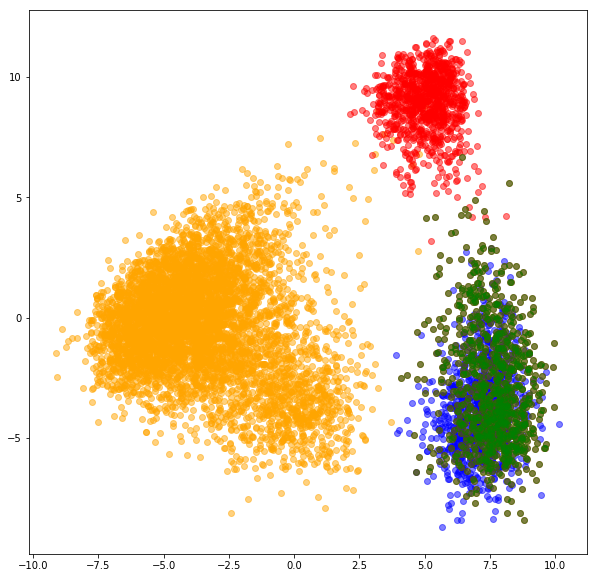

In [111]:
plt.figure(figsize=(10, 10))

for i in range(realmente_pca.shape[0]):
    cluster_label = kmeans.labels_[i]
    color = plt.cm.tab10(cluster_label)
    plt.scatter(realmente_pca[i, 0], realmente_pca[i, 1], color='orange', alpha=0.5)

for i in range(muy_pca.shape[0]):
    cluster_label = kmeans.labels_[i]
    color = plt.cm.tab10(cluster_label)
    plt.scatter(muy_pca[i, 0], muy_pca[i, 1], color='blue', alpha=0.5)

for i in range(rapidamente_pca.shape[0]):
    cluster_label = kmeans.labels_[i]
    color = plt.cm.tab10(cluster_label)
    plt.scatter(rapidamente_pca[i, 0], rapidamente_pca[i, 1], color='red', alpha=0.5)


for i in range(bastante_pca.shape[0]):
    cluster_label = kmeans.labels_[i]
    color = plt.cm.tab10(cluster_label)
    plt.scatter(bastante_pca[i, 0], bastante_pca[i, 1], color='green', alpha=0.5)

# plot the centers using a scatter plot
plt.show()
